# 2 - Intermediate - Row Power Calculation under different irradiances

Example for calculating power of a row, assigning values from a pickle where each pickle cell is the irradiance value in a cell in the module.


In [1]:
import pvmismatch  # this imports everything we need
import numpy as np
import seaborn as sns
import pandas as pd

#### Inputs

This is a 20 modules single row, with 72 cells in portrait


In [2]:
Nmods=20
portraitorlandscape = 'portrait'
numcells = 72

#### Input Irradiance

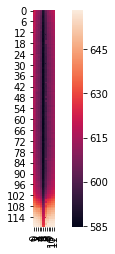

In [3]:
testfile = r'irr_1axis_11_06_13.pkl'
df = pd.read_pickle(testfile)
sns.heatmap(df, square=True)

#### Select module type

The stdpl matrix shows the placement of the cells in the module. The modules we are using are the standard PVMismatch modules, look at the references for the bypass diode groups, but because of this it does matter if the module is in ladscape or portrait.


In [4]:
# cell placement for 'portrait'.
if numcells == 72:
    stdpl=np.array([[0,	23,	24,	47,	48,	71],
    [1,	22,	25,	46,	49,	70],
    [2,	21,	26,	45,	50,	69],
    [3,	20,	27,	44,	51,	68],
    [4,	19,	28,	43,	52,	67],
    [5,	18,	29,	42,	53,	66],
    [6,	17,	30,	41,	54,	65],
    [7,	16,	31,	40,	55,	64],
    [8,	15,	32,	39,	56,	63],
    [9,	14,	33,	38,	57,	62],
    [10,	13,	34,	37,	58,	61],
    [11,	12,	35,	36,	59,	60]])

elif numcells == 96:
    stdpl=np.array([[0,	23,	24,	47,	48,	71,	72,	95],
        [1,	22,	25,	46,	49,	70,	73,	94],
        [2,	21,	26,	45,	50,	69,	74,	93],
        [3,	20,	27,	44,	51,	68,	75,	92],
        [4,	19,	28,	43,	52,	67,	76,	91],
        [5,	18,	29,	42,	53,	66,	77,	90],
        [6,	17,	30,	41,	54,	65,	78,	89],
        [7,	16,	31,	40,	55,	64,	79,	88],
        [8,	15,	32,	39,	56,	63,	80,	87],
        [9,	14,	33,	38,	57,	62,	81,	86],
        [10,	13,	34,	37,	58,	61,	82,	85],
        [11,	12,	35,	36,	59,	60,	83,	84]])

if portraitorlandscape == 'landscape':
    stdpl = stdpl.transpose()

cellsx = len(stdpl[1]); cellsy = len(stdpl)
    

#### Let's create the type of module we want

In [5]:
if cellsx*cellsy == 72:
    cell_pos = pvmismatch.pvmismatch_lib.pvmodule.STD72
elif cellsx*cellsy == 96:
    cell_pos = pvmismatch.pvmismatch_lib.pvmodule.STD96

pvmod=pvmismatch.pvmismatch_lib.pvmodule.PVmodule(cell_pos=cell_pos)


#### Let's make the system be just 1 module

In [6]:
#### Let's create the type of module we want

if cellsx*cellsy == 72:
    cell_pos = pvmismatch.pvmismatch_lib.pvmodule.STD72
elif cellsx*cellsy == 96:
    cell_pos = pvmismatch.pvmismatch_lib.pvmodule.STD96

pvmod=pvmismatch.pvmismatch_lib.pvmodule.PVmodule(cell_pos=cell_pos)

#### Let's make the 1 row, with 20 modules

In [7]:
pvsys = pvmismatch.pvsystem.PVsystem(numberStrs=1, numberMods=Nmods, pvmods=pvmod)  

print("Results at STC, no modifications yet")
print (" Pmp: %1.3f [W], Eff: %1.3f [%%], FF: %1.3F [%%]" % (pvsys.Pmp, pvsys.eff*100, pvsys.FF*100))
print (" Imp: %1.3f [A], Vmp: %1.3f [V], Isc: %1.3f [A], Voc: %1.3f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))
  

Results at STC, no modifications yet
 Pmp: 4818.961 [W], Eff: 21.825 [%], FF: 78.726 [%]
 Imp: 5.915 [A], Vmp: 814.665 [V], Isc: 6.306 [A], Voc: 970.752 [V]


#### Assign the dataframe irradiances to each cell in each module

We do this by creating a dictionary. Remember that the dataframe is in W/m2 and PVMismatch uses kW/m2 as irradiance inputs, so we have to divide by a 1000. 

In [8]:
modDict = {}
for i in range (0, Nmods):
        modDict[i] = [df[i*cellsx:(i+1)*cellsx].T/1000, stdpl]


In [9]:
pvsys.setSuns({0: modDict})   

print("System results with the irradiance profile")
print (" Pmp: %1.3f [W], Eff: %1.3f [%%], FF: %1.3F [%%]" % (pvsys.Pmp, pvsys.eff*100, pvsys.FF*100))
print (" Imp: %1.3f [A], Vmp: %1.3f [V], Isc: %1.3f [A], Voc: %1.3f [V]" % (pvsys.Imp, pvsys.Vmp, pvsys.Isc, pvsys.Voc))


System results with the irradiance profile
 Pmp: 2879.027 [W], Eff: 21.366 [%], FF: 75.367 [%]
 Imp: 3.551 [A], Vmp: 810.869 [V], Isc: 4.016 [A], Voc: 951.246 [V]
